In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
frames = []
usernames = ["JustinTrudeau","ElizabethMay","AndrewScheer","MaximeBernier","theJagmeetSingh"]
for username in usernames:
    file_path = "../data/{}_data.csv".format(username)
    timeline_df = pd.read_csv(file_path)
    frames.append(timeline_df)
total_df = pd.concat(frames,sort=False)  
total_df.head(3)  

,id,type,created_at,source,original_text,clean_text,favorite_count,retweet_count,hashtags,mentions,original_author,lda_cluster,to_date
0,1186063209381486593,tweet,Sun Oct 20 23:34:39 +0000 2019,"<a href=""https://studio.twitter.com"" rel=""nofo...","Andrew Scheer is against gay marriage, against...",andrew scheer gay marriage woman right choose ...,9289,3216,ChooseForward,NaN,JustinTrudeau,1,NaN
1,1186062450686337024,tweet,Sun Oct 20 23:31:38 +0000 2019,"<a href=""https://mobile.twitter.com"" rel=""nofo...",For lower taxes for everyone except the 1%. #C...,lower tax everyone except,1568,297,ChooseForward,NaN,JustinTrudeau,0,NaN
2,1186055621684187136,tweet,Sun Oct 20 23:04:30 +0000 2019,"<a href=""https://mobile.twitter.com"" rel=""nofo...",The choice is clear. For a real plan to make l...,choice clear real plan make life affordable vo...,1308,450,ChooseForward,NaN,JustinTrudeau,3,NaN


In [53]:
total_df["to_date"] = pd.to_datetime(total_df['created_at']).dt.date
tweets_over_time = total_df[["to_date","created_at"]]
tweets_over_time["tweets"] = total_df["created_at"]
tweets_over_time.head()
# tweets_over_time = total_df.groupby(total_df["to_date"]).count()
# tweets_over_time.rename({"created_at": "tweets"})
# # cumulative_tweets = tweets_over_time["tweets"].cumsum()
# tweets_over_time.head()

/Users/student/Desktop/School/CISC500/sourceCode/thesisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,to_date,created_at,tweets
0,2019-10-20,Sun Oct 20 23:34:39 +0000 2019,Sun Oct 20 23:34:39 +0000 2019
1,2019-10-20,Sun Oct 20 23:31:38 +0000 2019,Sun Oct 20 23:31:38 +0000 2019
2,2019-10-20,Sun Oct 20 23:04:30 +0000 2019,Sun Oct 20 23:04:30 +0000 2019
3,2019-10-20,Sun Oct 20 22:28:00 +0000 2019,Sun Oct 20 22:28:00 +0000 2019
4,2019-10-20,Sun Oct 20 21:57:46 +0000 2019,Sun Oct 20 21:57:46 +0000 2019


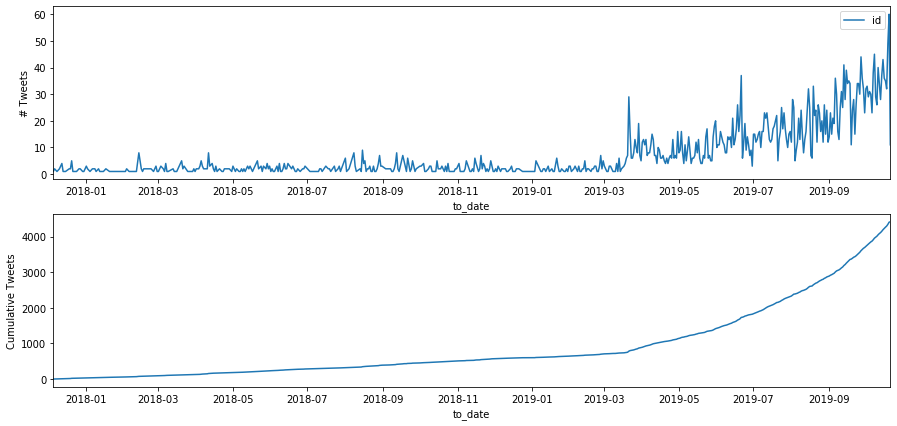

In [35]:
fig, _ = plt.subplots(figsize=(15,7))
ax = plt.subplot(2, 1, 1)
plt.ylabel('# Tweets')
tweets_over_time.plot(ax=ax)
ax = plt.subplot(2, 1, 2)
plt.ylabel('Cumulative Tweets')
plt.xlabel('Date')
cumulative_tweets.plot(ax=ax)